<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-pnogueron/blob/main/Segundo%20curso%20IBM/Segundo_Curso_IBM_Modulo_4_Semana_7_A01097897.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Data Analysis with Python - Segundo curso de IBM</H1>

Módulo 4 - Semana 7 </br>
Juan Pablo Noguerón Morales - A01097897</br>
Ciencia y analítica de datos


# Sección 1: Notebooks

In [114]:
#Importamos las librerías que estaremos usando

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import requests
from io import BytesIO

In [49]:
#Descarga del archivo Facebook Metrics
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
filename = url.split('/')
req = requests.get(url)
bt = BytesIO(req.content)

df = pd.read_csv(bt)
df.head()



,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear regression

In [50]:
#Primero creamos el objeto del modelo de regresión linear
lm = LinearRegression()
lm

LinearRegression()

In [51]:
#Para este primer ejercicio, estaremos usando la variable de Highway-mph como la variable independiente o X, mientras el precio será la variable dependiente o Y
X = df[['highway-mpg']]
Y = df['price']

In [52]:
#Realizamos el fit con los datos X y Y
lm.fit(X,Y)

LinearRegression()

In [53]:
#Ya se ha creado el modelo con la función fit. Podmemos ver el valor intercept y 
print('Valor del intercept: ', lm.intercept_)
print('Valor del coeficiente: ', lm.coef_[0])

print('Podemos deducir el modelo entonces como: ')
print('yhat = ', lm.intercept_, lm.coef_[0], 'X')

Valor del intercept:  38423.3058581574
Valor del coeficiente:  -821.7333783219254
Podemos deducir el modelo entonces como: 
yhat =  38423.3058581574 -821.7333783219254 X


In [54]:
#Con el modelo ya hecho, podemos hacer la predicción
Yhat=lm.predict(X)

#Observamos las primeras 10 predicciones
Yhat[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

<h2>Pregunta 1a: Crea un objeto de regresión lineal llamado lm1</h2>

In [55]:
lm1 = LinearRegression()
lm1

LinearRegression()

<h2>Pregunta 1b: Entrena el modelo usando engine-size como variable independiente</h2>

In [56]:
X1 = df[['engine-size']]
Y1 = df['price']

lm1.fit(X1, Y1)

LinearRegression()

<h2>Pregunta 1C: Encuentra el coeficiente y el intercept</h2>

In [57]:
#Ya se ha creado el modelo con la función fit. Podmemos ver el valor intercept y 
print('Valor del intercept: ', lm1.intercept_)
print('Valor del coeficiente: ', lm1.coef_[0])

print('Podemos deducir el modelo entonces como: ')
print('yhat = ', lm1.intercept_, '+', lm1.coef_[0], 'X')

Valor del intercept:  -7963.338906281042
Valor del coeficiente:  166.86001569141595
Podemos deducir el modelo entonces como: 
yhat =  -7963.338906281042 + 166.86001569141595 X


<h2>Pregunta 1d: Cuál es la ecuación</h2>

Yhat = -7963.34 + 166.86 * X

Price = -7963.34 + 166.86*df['engine-size']

In [58]:
Yhat = lm1.intercept_ + lm1.coef_[0] * X1

Price =  lm1.intercept_ + lm1.coef_[0] * X1

## Multiple linear regression

In [59]:
#Definimos las variables de entrada que usaremos
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [60]:
#realizamos el fit para el modelado
lm.fit(Z, df['price'])

LinearRegression()

In [63]:
#Una vez obtenido el modelo, podemos obtener el coeficiente y el intercept
print('Valor del intercept: ', lm.intercept_)
print('Valor del coeficiente: ', lm.coef_)

print('En este caso como se puede observar, hay varios valores coeficiente, cada uno corresponde a una variable de entrada')

Valor del intercept:  -15806.62462632922
Valor del coeficiente:  [53.49574423  4.70770099 81.53026382 36.05748882]
En este caso como se puede observar, hay varios valores coeficiente, cada uno corresponde a una variable de entrada


<h2>Pregunta 2a: Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".</h2>

In [64]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

<h2>Pregunta 2b: Encuentra el coeficiente del modelo</h2>

In [66]:
#Una vez obtenido el modelo, podemos obtener el coeficiente y el intercept
print('Valor del intercept: ', lm2.intercept_)
print('Valor del coeficiente: ', lm2.coef_)

Valor del intercept:  38201.31327245728
Valor del coeficiente:  [   1.49789586 -820.45434016]


Con los valores obtenidos, el modelo es:

yhat = 38201.31 + (1.49 * X1) - 820.45 * X2

X1 = Normalized losses
X2 = Highway - MPG

## Evaluación usando visualización

### Regression plot

(0.0, 48159.00249030782)

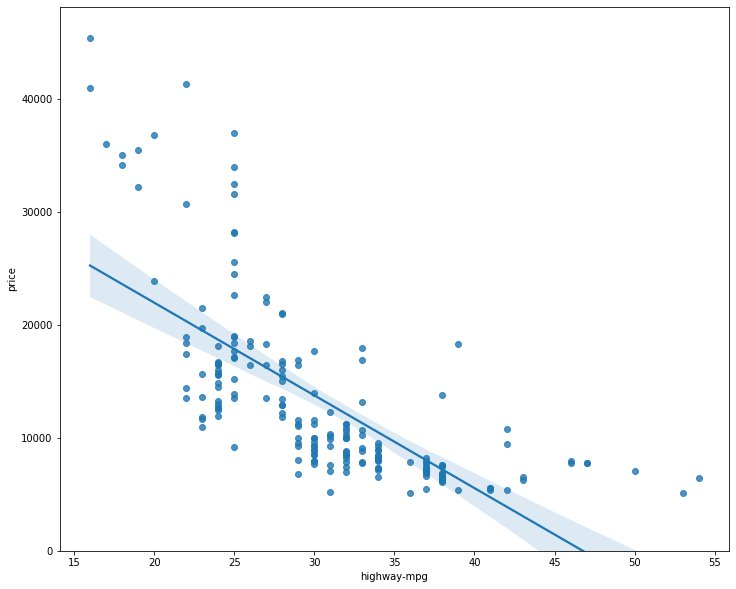

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

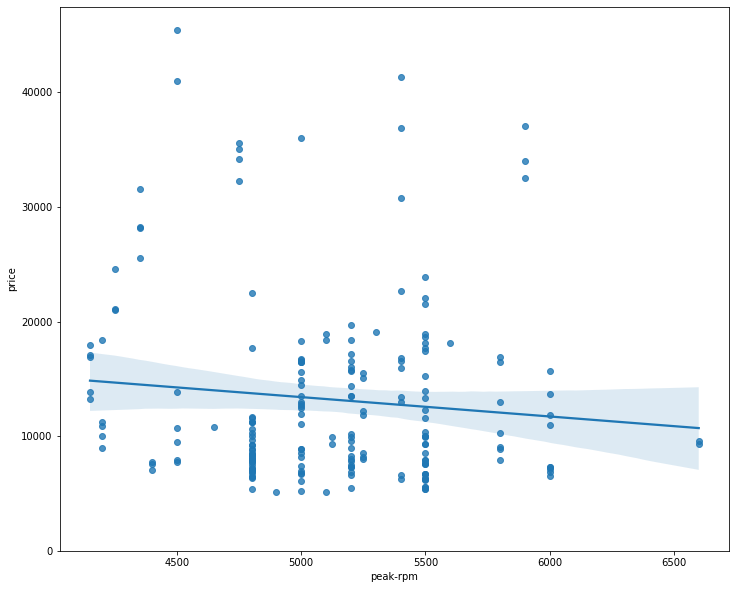

In [68]:
#Grafica de regresión usando  peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<h2>Pregunta 3: Cuál de las dos variables está más correlacionada?</h2>

In [69]:
#Se puede observar que highway-mpg tiene más correlación con la variable de salida. Se puede comprobar usando el método corr
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual plot

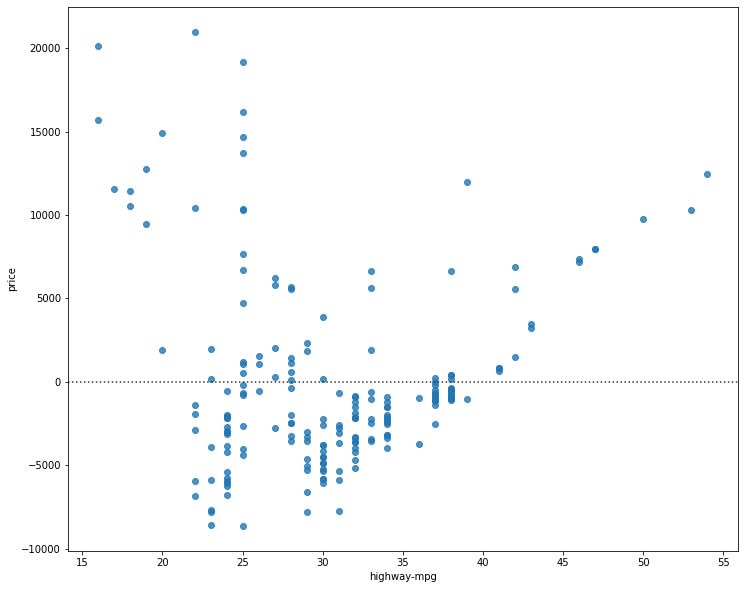

In [70]:
#Procedemos a graficar el residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Se puede observar que la disperción es bastante amplia. La variable por si misma no es capaz de explicar el precio de los autos. Una regresión lineal simple no es adecuada

### Multiple linear regression

In [72]:
#Hacemos la predicción de los datos usando Z ()
#Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


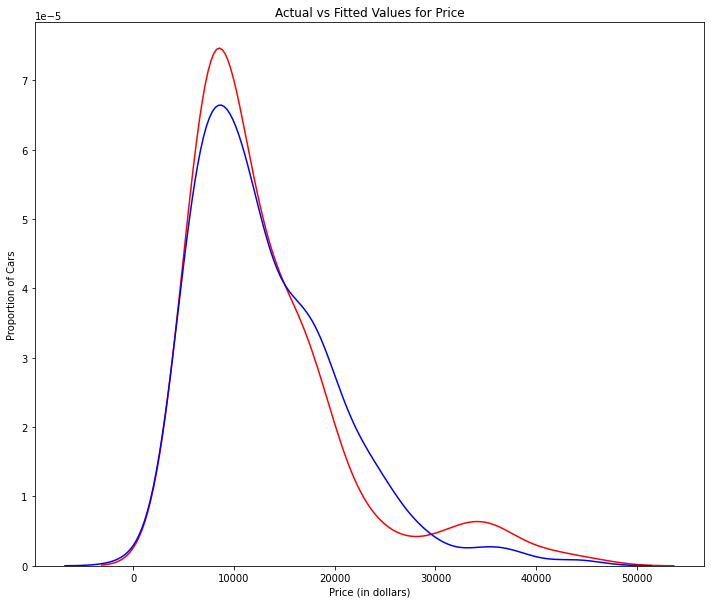

In [73]:
#Y procedemos a graficar
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Se puede observar que la nueva regresión, considerando más variables en vez de una, se acerca demasiado a los resultados esperados. Esto nos indica que el modelo elegido es bueno 

## Polinomial Regression and pipelines

### Polinomial regression

In [74]:
#Primero vamos a definir una función para procesar gráficas
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [75]:
#Definimos nuestra variable independiente highway-mpg y la dependiente precio
x = df['highway-mpg']
y = df['price']

In [78]:
#Finalmente procedemos a hacer el fit para el modelo polinomial
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


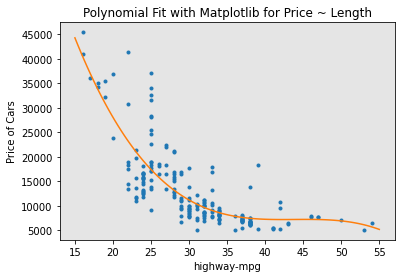

In [79]:
#Ahora graficamos
PlotPolly(p, x, y, 'highway-mpg')

In [80]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<h2>Crear un modelo polinomial de orden 11 con las mismas variables</h2>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


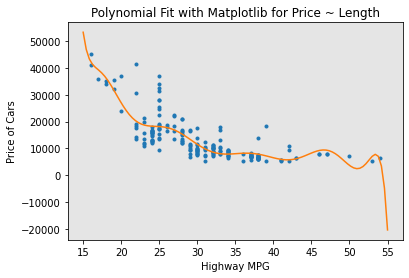

In [85]:
f11 = np.polyfit(x, y, 11)
p11 = np.poly1d(f11)
print(p11)

PlotPolly(p11, x, y, 'Highway MPG')

Ahora usaremos la librería de scikit en lugar de numpy

In [88]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [89]:
#Hacemos el fit transform
Z_pr=pr.fit_transform(Z)

In [90]:
#COmparamos antes del transform y después del transform
Z.shapeZ_pr.shape

(201, 4)

In [91]:
Z_pr.shape

(201, 15)

### Pipeline

In [93]:
#Creamos los pasos del pipeline. 
#Primero se hara una estandarización,
#Segundo se creará el modelo polinomial
#Por último se hará una regresión lineal
Input=[
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model',LinearRegression())
]

In [94]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [95]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [96]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>Pregunta 5: Crea un pl que estandarice la información, y luego utilice regresión lineal con Z y Y</h2>

In [102]:
input2 = [
    ('scale', StandardScaler()), 
    ('model',LinearRegression())
]

pipe = Pipeline(input2)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [103]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [104]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Medidas de evaluación

### Modelo 1: Regresión lineal simple

In [123]:
#Primero obtenemos el score R2 para el modelo lineal de X entrada, Y salida
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Se puede observar que el score no es muy bueno

In [109]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [110]:
#Ahora validamos usando mean square error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Modelo 2: Regresión lineal múltiple

In [111]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [112]:
#Ahora obtenemos el mean square error
Y_predict_multifit = lm.predict(Z)

In [113]:
# Y comparamos
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Modelo 3: Modelo polinomial 

In [115]:
#Obtenemos el R 2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [116]:
#También obtenemos el mse
mean_squared_error(df['price'], p(x))

20474146.426361218

## Predicción y toma de decisiones

In [118]:
#Creamos un nuevo input  con un rango del 1 al 100
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [120]:
#Hacemos fit con regresión lineal simple
lm.fit(X, Y)
lm

LinearRegression()

In [121]:
#Y predecimos
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

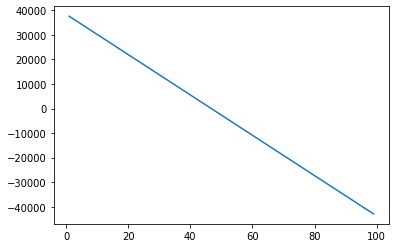

In [122]:
#FInalmente graficamos
plt.plot(new_input, yhat)
plt.show()

# Sección 2: Graded Review Questions


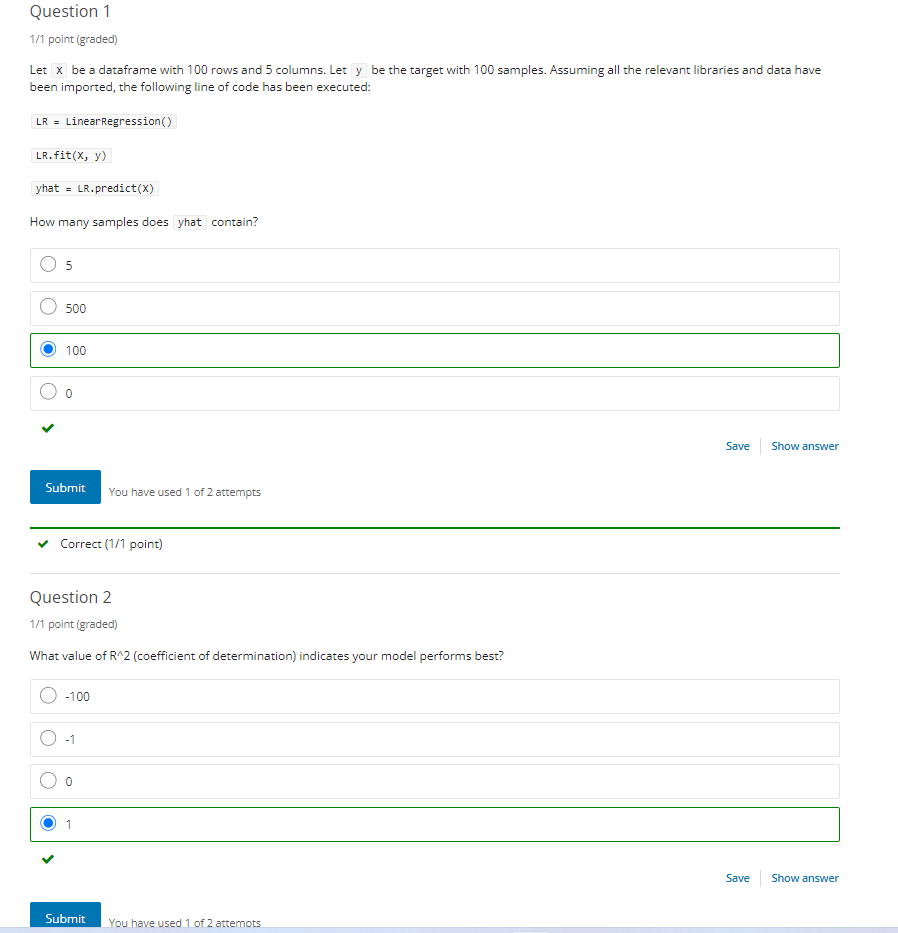

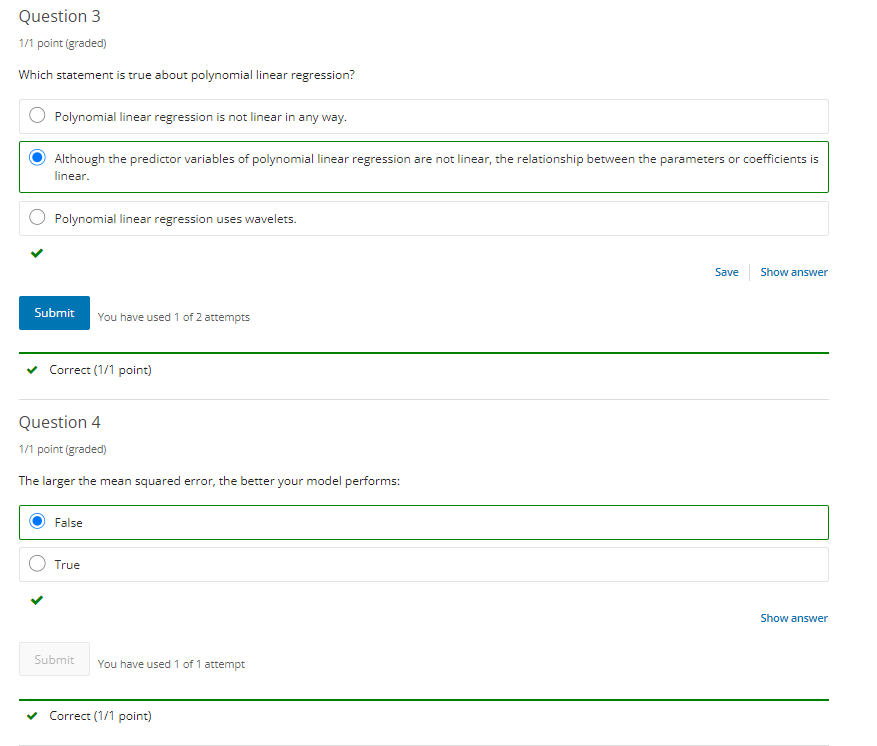

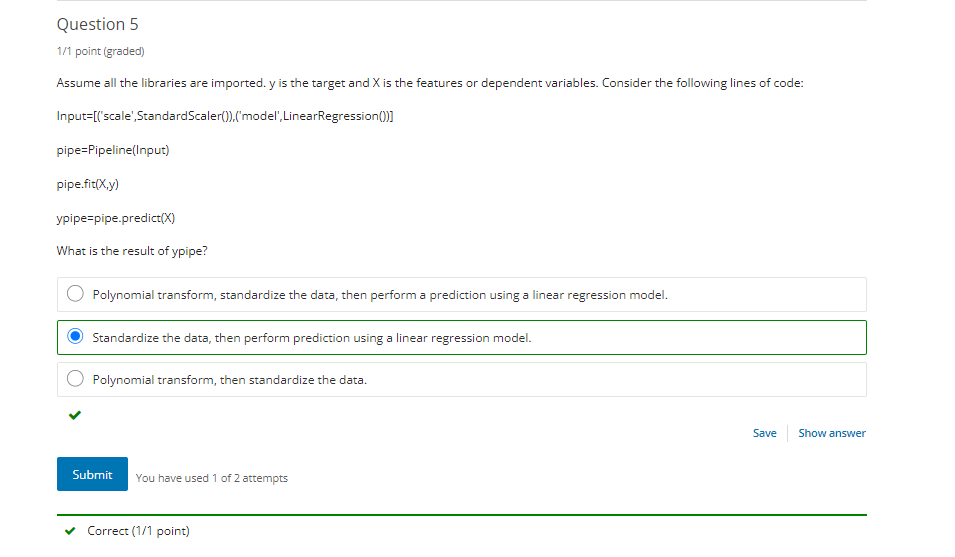

# Sección 3: Evidencia

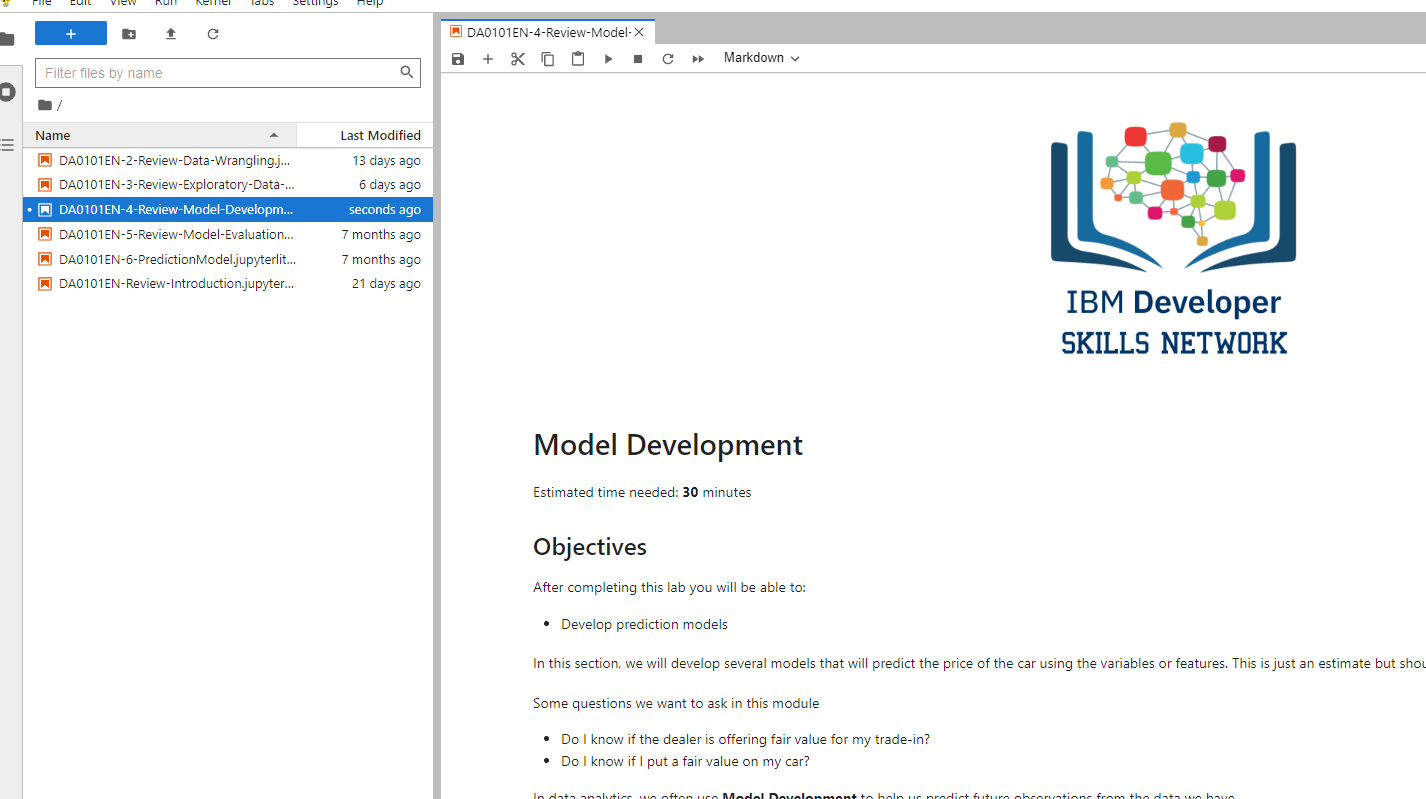

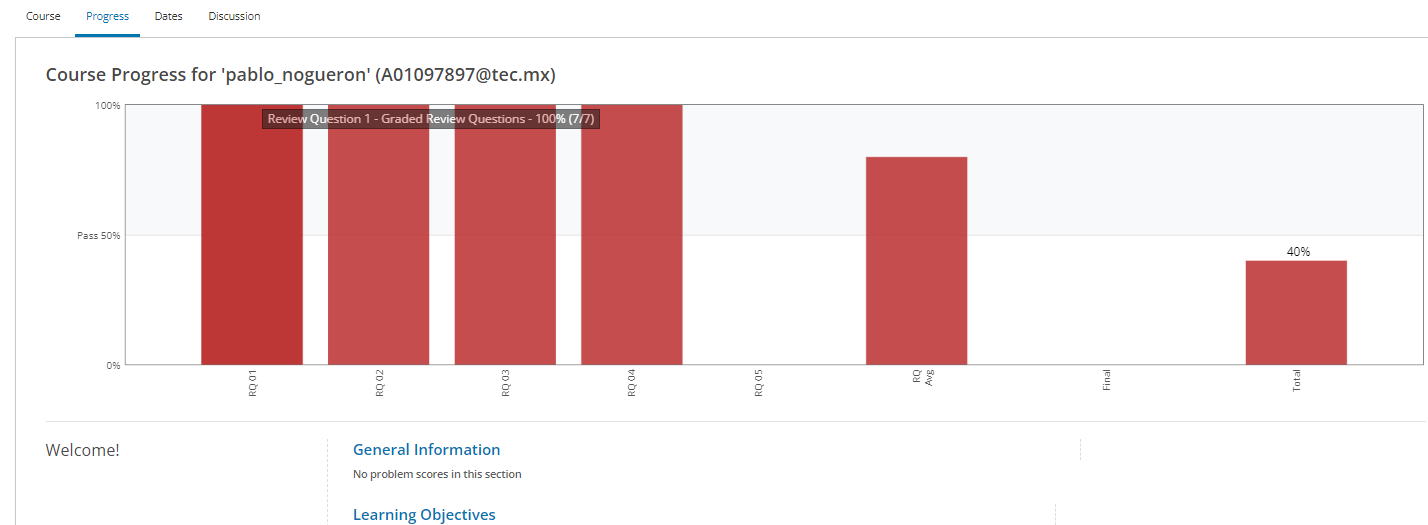